,Name,Baseline,GHCB,HotCalls
0,none,140,136,139
1,getpid,788,12370,914
2,getuid,742,11925,3307
3,read,1335,16243,8944
4,write,623,13717,4816
5,ioctl,395,14596,3749
6,mmap,3348,22765,8958
7,pkey_alloc,360,16394,3440
8,clock_gettime,137,323,161
9,mincore,1926,17494,8543


,Name,Baseline,GHCB,HotCalls
0,none,1.0,0.971429,0.992857
1,getpid,1.0,15.697970,1.159898
2,getuid,1.0,16.071429,4.456873
3,read,1.0,12.167041,6.699625
4,write,1.0,22.017657,7.730337
5,ioctl,1.0,36.951899,9.491139
6,mmap,1.0,6.799582,2.675627
7,pkey_alloc,1.0,45.538889,9.555556
8,clock_gettime,1.0,2.357664,1.175182
9,mincore,1.0,9.083074,4.435618


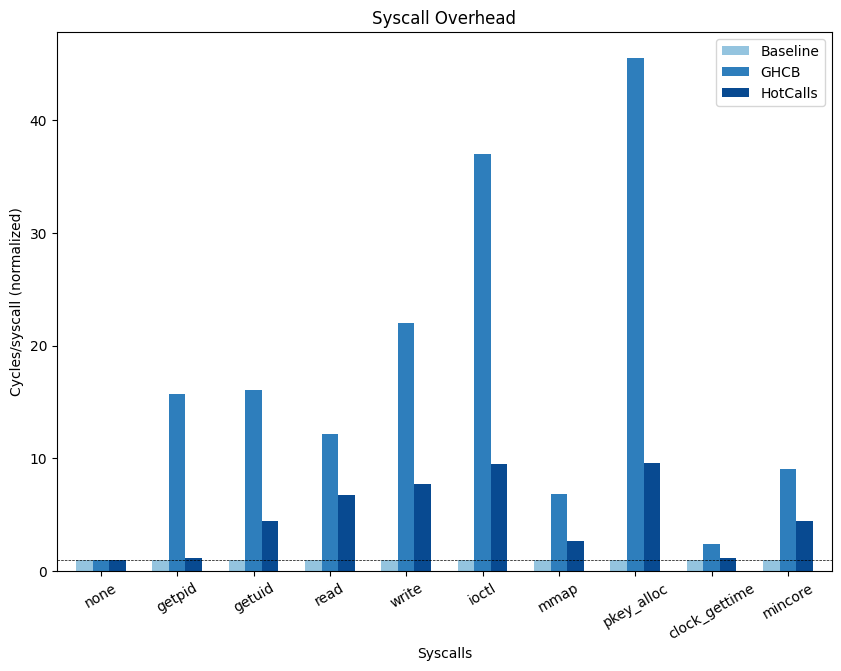

<Figure size 640x480 with 0 Axes>

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import io
import re
import numpy as np

data = """
Name,Syscall,GHCB,HotCalls
none,140,136,139
getpid,788,12370,914
getuid,742,11925,3307
read,1335,16243,8944
write,623,13717,4816
ioctl,395,14596,3749
mmap,3348,22765,8958
pkey_alloc,360,16394,3440
clock_gettime,137,323,161
mincore,1926,17494,8543
"""

# df0 = pd.read_table(io.StringIO(data), delimiter=':', skiprows=7, engine='python')
df = pd.read_csv(io.StringIO(data), sep=',')
df.columns = ['Name', 'Baseline', 'GHCB', 'HotCalls']
display(df)
# Normalize the data
df['GHCB'] = df['GHCB'] / df['Baseline']
df['HotCalls'] = df['HotCalls'] / df['Baseline']
df['Baseline'] = df['Baseline'] / df['Baseline']
display(df)

# Colors
colors = plt.get_cmap("Blues")

# draw the plot
plot=df.plot(x='Name', y=['Baseline', 'GHCB', 'HotCalls'], kind='bar', title='Syscall Overhead', 
            color=[colors(0.4), colors(0.7), colors(0.9)], figsize=(10, 7), width=0.65)
# Change column names to be more descriptive
# plot horizontal line at y=1
plt.axhline(y=1, color='black', linestyle='--', linewidth=0.5)
# xticks labels rotation angle and alignment 30 degree
plt.xticks(rotation=30)
# place legend in the bottom right corner
plt.xlabel("Syscalls")
plt.ylabel("Cycles/syscall (normalized)")
plt.title("Syscall Overhead")
plt.legend(loc='upper right')
plt.show()
plt.tight_layout()
# save as pdf
f = plot.get_figure()
f.savefig("syscall_overhead.pdf")